In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [9]:
# Load data
# Try reading the file with a different encoding
try:
    df = pd.read_csv('Watches Bags Accessories.csv', encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv('Watches Bags Accessories.csv', encoding='cp1252')

In [10]:
df.head()

,Title,Rating in Stars,Rating Count,Sold Count,Voucher,Delivery,Currency,Current Price,Original Price,Link,Category
0,Yfashion Cartoon Electronic Watch Life Water...,4.6/5,707,6K Sold,0,Free Delivery,Rs.,287,Rs. 520,//www.daraz.pk/products/y-led-3-i258744118-s14...,Kids Watches
1,"100% Imported LED watch for men , boys and Kid...",4.3/5,293,1K Sold,0,0,Rs.,270,Rs. 999,//www.daraz.pk/products/100-led-2023-i40167553...,Kids Watches
2,1 Cartoon Characters Analog Wrist Watch For Ki...,4.5/5,57,452 Sold,0,Free Delivery,Rs.,225,Rs. 750,//www.daraz.pk/products/1-i423737473-s20070599...,Kids Watches
3,M3 Touch LED Bracelet Digital Watch Band Good ...,4.6/5,51,332 Sold,0,Free Delivery,Rs.,160,Rs. 299,//www.daraz.pk/products/m3-led-led-i432456407-...,Kids Watches
4,led Watches For Boys and Girls and kids,4.4/5,54,476 Sold,0,Free Delivery,Rs.,198,Rs. 300,//www.daraz.pk/products/led-i398157365-s192654...,Kids Watches


In [17]:
def convert_rating(rating):
    try:
        if '/' in rating:
            return float(rating.split('/')[0])
        return float(rating)
    except ValueError:
        return np.nan  # Return NaN for values that cannot be converted

# Apply the conversion to 'Rating in Stars'
df['Rating in Stars'] = df['Rating in Stars'].apply(convert_rating)

# You might want to check how many NaNs were introduced and decide how to handle them
print(df['Rating in Stars'].isna().sum())

107


In [19]:
# Impute using the mean
mean_imputer = SimpleImputer(strategy='mean')
df['Rating in Stars'] = mean_imputer.fit_transform(df[['Rating in Stars']])

In [21]:
def convert_sold_count(sold_count):
    # Check if the value is a string
    if isinstance(sold_count, str):
        # Remove the word 'Sold' and any spaces
        sold_count = sold_count.replace(' Sold', '').strip()
        
        # Check for 'K' or 'M' and convert accordingly
        if 'K' in sold_count:
            return int(float(sold_count.replace('K', '')) * 1000)
        elif 'M' in sold_count:
            return int(float(sold_count.replace('M', '')) * 1000000)
        else:
            # Convert directly to int, handling any unexpected non-numeric cases
            try:
                return int(sold_count)
            except ValueError:
                return np.nan  # Return NaN for values that cannot be converted to int
    elif isinstance(sold_count, (int, float)):
        # If it's already a numeric type, just return it as is
        return sold_count
    else:
        # For any other cases that are neither str nor numeric (e.g., NaN)
        return np.nan

# Apply the conversion to 'Sold Count'
df['Sold Count'] = df['Sold Count'].apply(convert_sold_count)

# Check how many NaNs were introduced due to conversion issues
print(df['Sold Count'].isna().sum())


34


In [22]:
# Create an imputer object using median as the strategy
median_imputer = SimpleImputer(strategy='median')

# Impute the missing values in the 'Sold Count' column
df['Sold Count'] = median_imputer.fit_transform(df[['Sold Count']])

# Check if any NaN values remain
print(df['Sold Count'].isna().sum())

0


In [23]:
# Encoding categorical variables and scaling numerical features
categorical_features = ['Category']
numerical_features = ['Rating in Stars', 'Rating Count', 'Sold Count', 'Current Price', 'Original Price']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [29]:
def clean_numeric(x):
    if isinstance(x, str):  # Check if the value is a string
        # Remove 'Rs.' and commas, then strip any remaining whitespace
        x = x.replace('Rs.', '').replace(',', '').strip()
        try:
            return float(x)  # Convert to float
        except ValueError:
            return np.nan  # Return NaN for values that cannot be converted
    return x

# Apply this cleaning function to the necessary columns
df['Rating Count'] = df['Rating Count'].apply(clean_numeric)
df['Current Price'] = df['Current Price'].apply(clean_numeric)
df['Original Price'] = df['Original Price'].apply(clean_numeric)

# Check if there are any NaN values introduced by this cleaning
print(df[['Rating Count', 'Current Price', 'Original Price']].isna().sum())


Rating Count       0
Current Price      0
Original Price    68
dtype: int64


In [30]:
# Create an imputer object using median as the strategy
median_imputer = SimpleImputer(strategy='median')

# Impute the missing values in the 'Original Price' column
df['Original Price'] = median_imputer.fit_transform(df[['Original Price']])

# Check if any NaN values remain
print(df['Original Price'].isna().sum())

0


In [31]:
# Check the columns being passed to each part of the ColumnTransformer
print("Numeric Features:", df[numerical_features].head())
print("Categorical Features:", df[categorical_features].head())

# Test the transformations separately
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Test the numerical pipeline
scaler = StandardScaler()
print(scaler.fit_transform(df[numerical_features].fillna(0)))  # Use fillna if NaNs are present

# Test the categorical pipeline
encoder = OneHotEncoder()
print(encoder.fit_transform(df[categorical_features]))


Numeric Features:    Rating in Stars  Rating Count  Current Price  Original Price
0              4.6           707          287.0           520.0
1              4.3           293          270.0           999.0
2              4.5            57          225.0           750.0
3              4.6            51          160.0           299.0
4              4.4            54          198.0           300.0
Categorical Features:        Category
0  Kids Watches
1  Kids Watches
2  Kids Watches
3  Kids Watches
4  Kids Watches
[[ 0.48399423  1.1748147  -0.63424209 -0.55317762]
 [-0.05474295  0.21101058 -0.66048377 -0.25836583]
 [ 0.30441517 -0.33840432 -0.72994703 -0.41161872]
 ...
 [ 0.12483611 -0.45946184 -0.62189307 -0.47316607]
 [-0.05474295 -0.14517789 -0.26068412 -0.45100902]
 [ 0.48399423 -0.45946184 -0.65276563 -0.25836583]]
  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 0)	

In [32]:
# Check the head of the data to ensure the split is correct
print(X_train.head())
print(y_train.head())


                                                 Title  Rating in Stars  \
875  New Women Wallets Fashion PU Leather Top Quali...              4.1   
949  Eastern Watches 3 Chrono Stain Less Steel Anal...              4.2   
618  Winter Rabbit Knit Mittens Plush Fingerless Gl...              4.9   
881  Ladies Bags Cross Body Shoulder Bags at Discou...              4.2   
590  LouisWill Men Casuals Fashion Watches Quartz W...              4.5   

     Rating Count     Voucher       Delivery Currency Current Price  \
875            80           0  Free Delivery      Rs.           339   
949           151           0  Free Delivery      Rs.           549   
618           498  4 Vouchers  Free Delivery      Rs.         1,037   
881            33           0              0      Rs.           810   
590            46  3 Vouchers  Free Delivery      Rs.         1,940   

    Original Price                                               Link  \
875        Rs. 550  //www.daraz.pk/products/-i431

In [35]:
# Assuming 'Sold Count' is the target and has already been processed similarly
X = df.drop('Sold Count', axis=1)
y = df['Sold Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)  # Training the model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Rating in Stars',
                                                   'Rating Count',
                                                   'Current Price',
                                                   'Original Price']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Category'])])),
                ('regressor', LinearRegression())])

In [36]:
# Predicting and evaluating
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 358225.4181427115
R2 Score: 0.9275229975029149


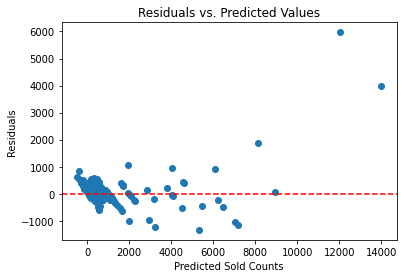

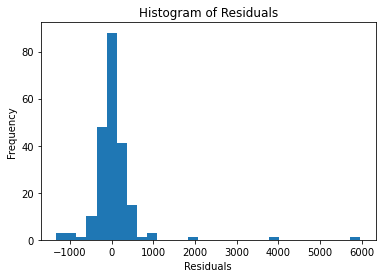

In [38]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Sold Counts')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Checking for normality of residuals
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
